# Week 2 Discussion

In [8]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from ipywidgets import interact, FloatLogSlider

# Set seed for reproducibility
np.random.seed(0)

# Generate data
np.random.seed(42)
n_samples = 200 
X = np.zeros((n_samples, 6))
X[:, 0] = np.random.normal(0, 1, n_samples)  # X1 - Important feature
X[:, 1] = np.random.normal(0, 1, n_samples)  # X2 -  Important feature
X[:, 2] = X[:, 0] + np.random.normal(0, 0.1, n_samples)  # Correlated with X1
X[:, 3] = X[:, 1] + np.random.normal(0, 0.1, n_samples)  # Correlated with X2
X[:, 4] = np.random.normal(0, 0.1, n_samples)  # Noise
X[:, 5] = np.random.normal(0, 0.1, n_samples)  # Noise

y = 3 * X[:, 0] + 2 * X[:, 1] + 0.5 * X[:, 2] + np.random.normal(0, 0.1, n_samples) 

In [3]:
# Split the training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
# Create and fit Ridge regression model
ridge_model = Ridge() # initialize. default alpha is 10
ridge_model.fit(X_train, Y_train) # fit data on x_train and y_train

ridge_predictions = ridge_model.predict(X_test) # predict on test data

# Calculate MSE and R2 for Ridge regression
ridge_rmse = np.sqrt(mean_squared_error(Y_test, ridge_predictions))
ridge_r2 = r2_score(Y_test, ridge_predictions)

print("Ridge regression RMSE:", ridge_rmse)
print("Ridge regression R-squared:", ridge_r2)

Ridge regression RMSE: 0.1441002017182506
Ridge regression R-squared: 0.9984722762470865


In [5]:
# Create and fit Lasso regression model
lasso_model = Lasso()
lasso_model.fit(X_train, Y_train)

lasso_predictions = lasso_model.predict(X_test)

# Calculate MSE and R2 for Lasso regression
lasso_rmse = np.sqrt(mean_squared_error(Y_test, lasso_predictions))
lasso_r2 = r2_score(Y_test, lasso_predictions)  

print("Lasso regression RMSE:", lasso_rmse)
print("Lasso regression R-squared:", lasso_r2)

Lasso regression RMSE: 1.298497899007902
Lasso regression R-squared: 0.8759496036905758


In [ ]:
# Visualize alphas against RMSE for lasso and ridge

plt.figure(figsize=(10,5))
plt.plot(alphas, rmse_lasso, label = "Lasso MSE")
plt.plot(alphas, rmse_ridge, label="Ridge MSE")
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Root Mean Squared Error')
plt.title('RMSE vs. Alpha for Lasso and Ridge Regression')
plt.legend()
plt.show()

In [ ]:
# Create function for creating plot



### Coefficient bar plot

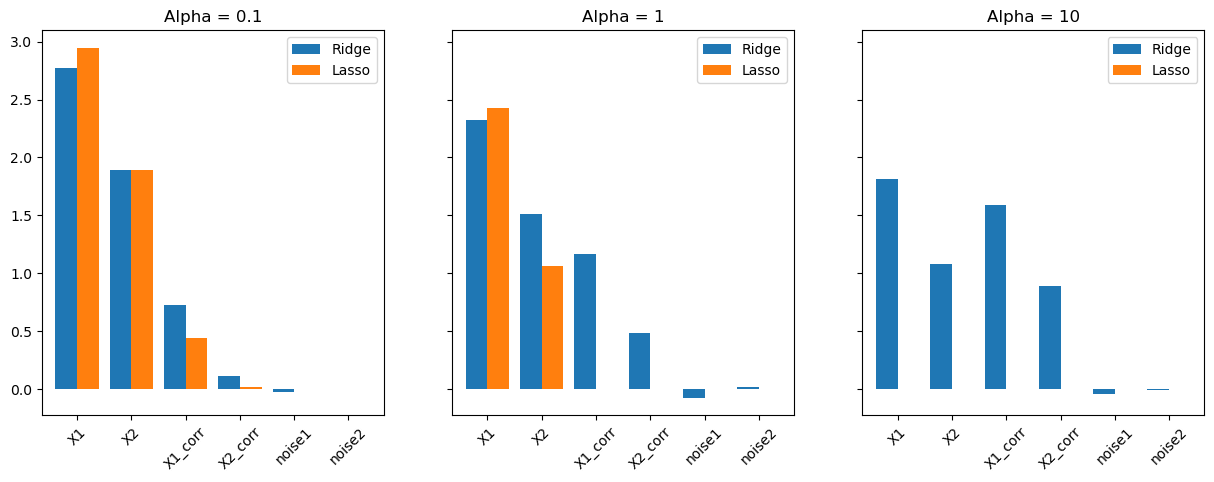

In [11]:
alphas = [0.1, 1, 10]
data = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha).fit(X,y)
    lasso = Lasso(alpha=alpha).fit(X,y)

    data.append(pd.DataFrame({
        'Ridge':ridge.coef_,
        'Lasso':lasso.coef_
    }, index = ['X1', 'X2', 'X1_corr', 'X2_corr', 'noise1', 'noise2']))

fig, axes = plt.subplots(1,3, figsize = (15,5), sharey = True) # 1 row and 3 columns
for i, df in enumerate(data): # i tracks which plot we're at, df looks at different data frames for diff alphas
    df.plot.bar(ax=axes[i], width = 0.8)
    axes[i].set_title(f"Alpha = {alphas[i]}")
    axes[i].set_xticklabels(df.index, rotation = 45)

plt.show()



Lasso can push coeff all the way to zero, but ridge can't. 

In [17]:
def update_alphas(alpha, model_type):
    if model_type == 'Lasso':
        model = Lasso(alpha=alpha)
    else:
        model = Ridge(alpha=alpha)

    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
    r2 = r2_score(Y_test, y_pred)

    plt.figure(figsize = (10,5))
    plt.scatter(Y_test, y_pred, color='blue', alpha=0.5, label=f"Predictions (alpha = {alpha:.4f})")
    plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2) # k-- is black, lw=2 is dashed
    plt.title(f"{model_type} Regression: Predictions vs Actual (alpha = {alpha:.4f})")
    plt.xlabel('Actual values')
    plt.ylabel('Predicted values')
    plt.legend()
    plt.figtext(0.5, -0.05, f"RMSE: {rmse:.4f}, R2: {r2:.4f}", ha='center', fontsize=12, bbox={"facecolor": "green"})
    plt.show()

# Create interactive widget
alpha_slider = FloatLogSlider(value = 1.0, base = 10, min = -3, max = 3, step = 0.1, description = 'Alpha') # value is default value. min and max in relation to the base
model_selector = {'Lasso Model': 'Lasso', 'Ridge Model': 'Ridge'} # what is it called in the interactive feature: what it's called in the function

interact(update_alphas, alpha = alpha_slider, model_type = model_selector)

interactive(children=(FloatLogSlider(value=1.0, description='Alpha', max=3.0, min=-3.0), Dropdown(description=…

<function __main__.update_alphas(alpha, model_type)>